In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.svm import SVR

C:\Users\UT\AppData\Local\Temp\ipykernel_12872\1574789598.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data

In [2]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Label Encoding

In [5]:
l = LabelEncoder()

In [6]:
data["mainroad"] = l.fit_transform(data["mainroad"])
data["guestroom"] = l.fit_transform(data["guestroom"])
data["basement"] = l.fit_transform(data["basement"])
data["hotwaterheating"] = l.fit_transform(data["hotwaterheating"])
data["airconditioning"] = l.fit_transform(data["airconditioning"])
data["prefarea"] = l.fit_transform(data["prefarea"])
data["furnishingstatus"] = l.fit_transform(data["furnishingstatus"])

In [7]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [8]:
data.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

In [9]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
data.shape

(545, 13)

In [12]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# Checking for Null values

In [13]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Outlier Detection

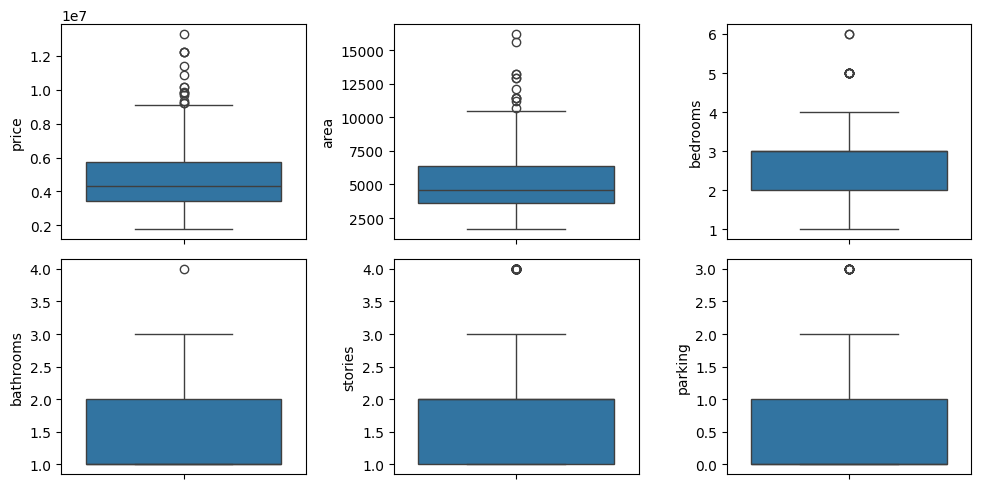

In [14]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

In [15]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Removing Outliers

In [16]:
data.clip(data.quantile(0.2),data.quantile(0.9),axis = 1, inplace = True)

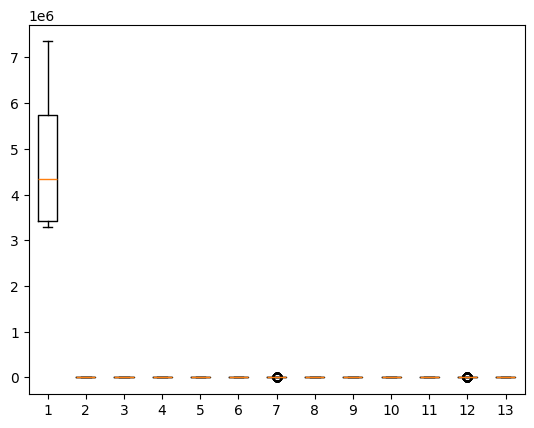

In [17]:
plt.boxplot(data)
plt.show()

# Data Visualization

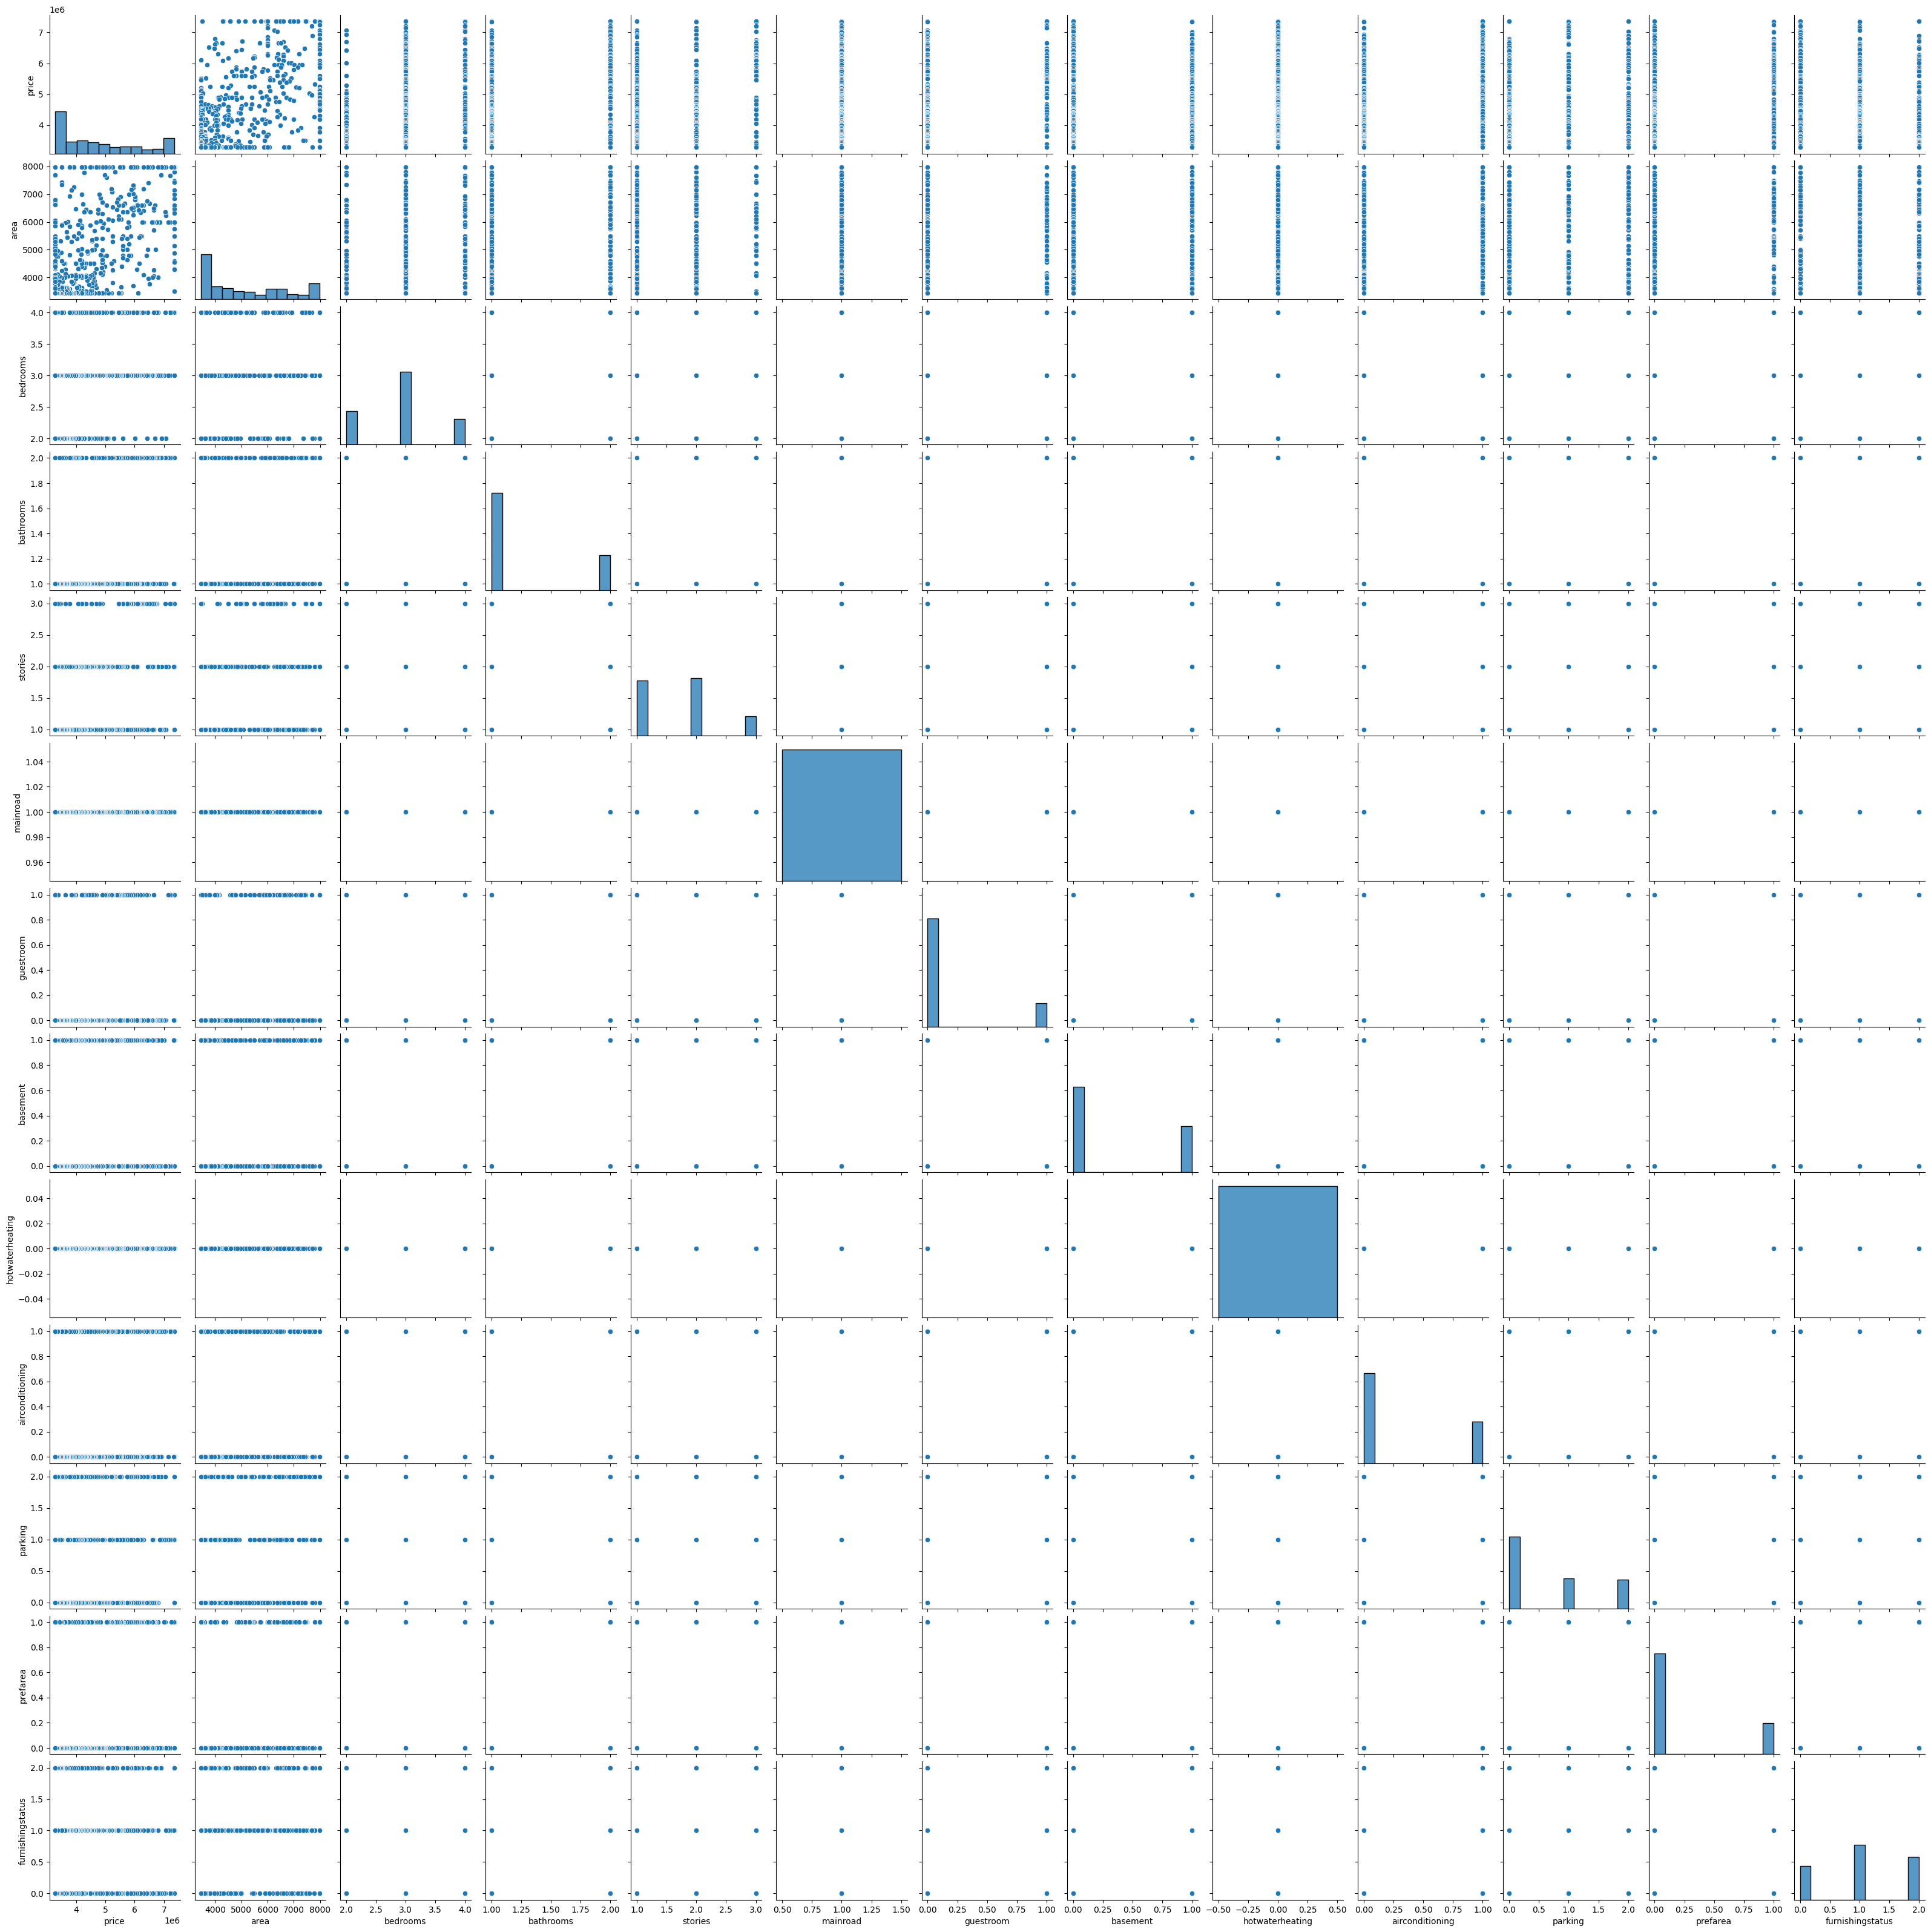

In [18]:
sns.pairplot(data)

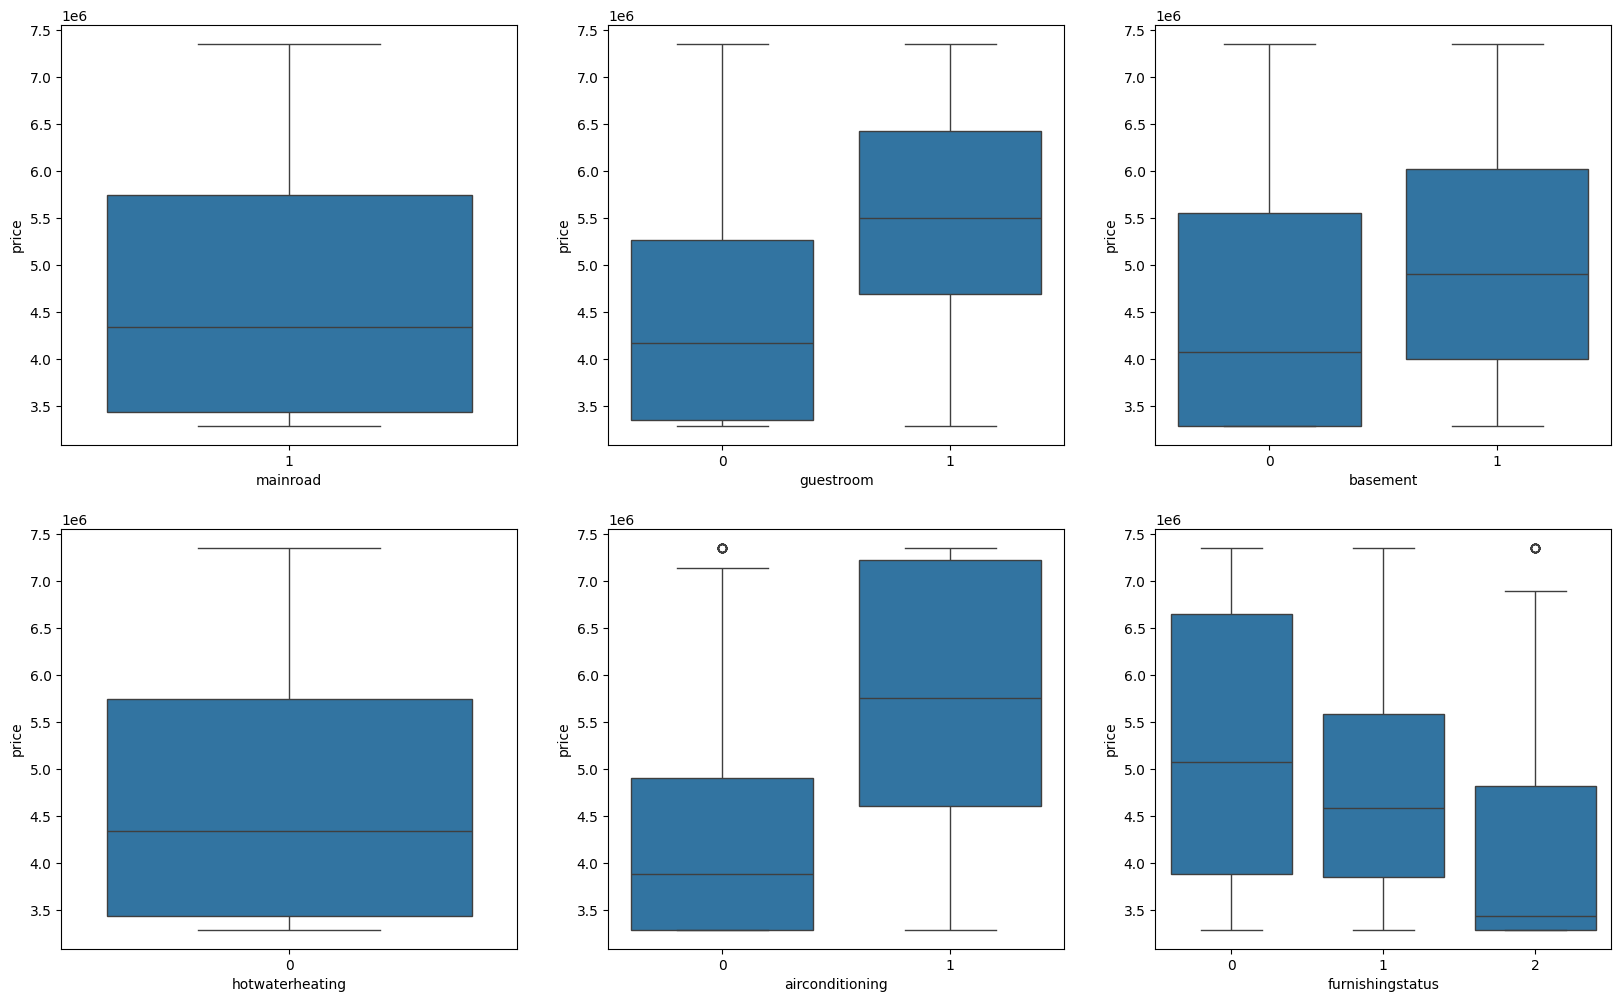

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

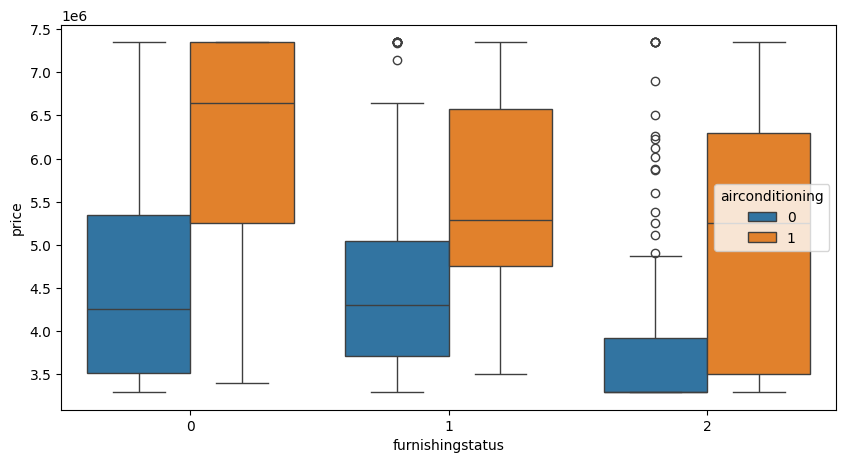

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()


# Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
x = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y = data[["price"]]

In [24]:
n_scale = scaler.fit_transform(x)

In [25]:
df = pd.DataFrame(n_scale,columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'])
df["price"] = y

In [26]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,0.876380,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7350000
1,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7350000
2,1.000000,0.5,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.5,7350000
3,0.894040,1.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,7350000
4,0.876380,1.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3290000
541,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,3290000
542,0.037528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3290000
543,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3290000


# Feature selection methods

In [27]:
df.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
area,1.000000,0.183610,0.214953,0.075538,NaN,0.200117,0.080105,NaN,0.275439,0.356244,0.280355,-0.184396,0.583107
bedrooms,0.183610,1.000000,0.374939,0.476998,NaN,0.089882,0.097080,NaN,0.181921,0.151413,0.099004,-0.133012,0.377845
bathrooms,0.214953,0.374939,1.000000,0.308015,NaN,0.134589,0.109323,NaN,0.210907,0.165313,0.080300,-0.158873,0.512251
stories,0.075538,0.476998,0.308015,1.000000,NaN,0.028515,-0.150903,NaN,0.250236,0.008763,0.058863,-0.105904,0.400242
mainroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,0.200117,0.089882,0.134589,0.028515,NaN,1.000000,0.372066,NaN,0.138179,0.046371,0.160897,-0.118328,0.286946
basement,0.080105,0.097080,0.109323,-0.150903,NaN,0.372066,1.000000,NaN,0.047341,0.055498,0.228083,-0.112831,0.180083
hotwaterheating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,0.275439,0.181921,0.210907,0.250236,NaN,0.138179,0.047341,NaN,1.000000,0.162645,0.117382,-0.150477,0.471126
parking,0.356244,0.151413,0.165313,0.008763,NaN,0.046371,0.055498,NaN,0.162645,1.000000,0.096049,-0.176597,0.363864


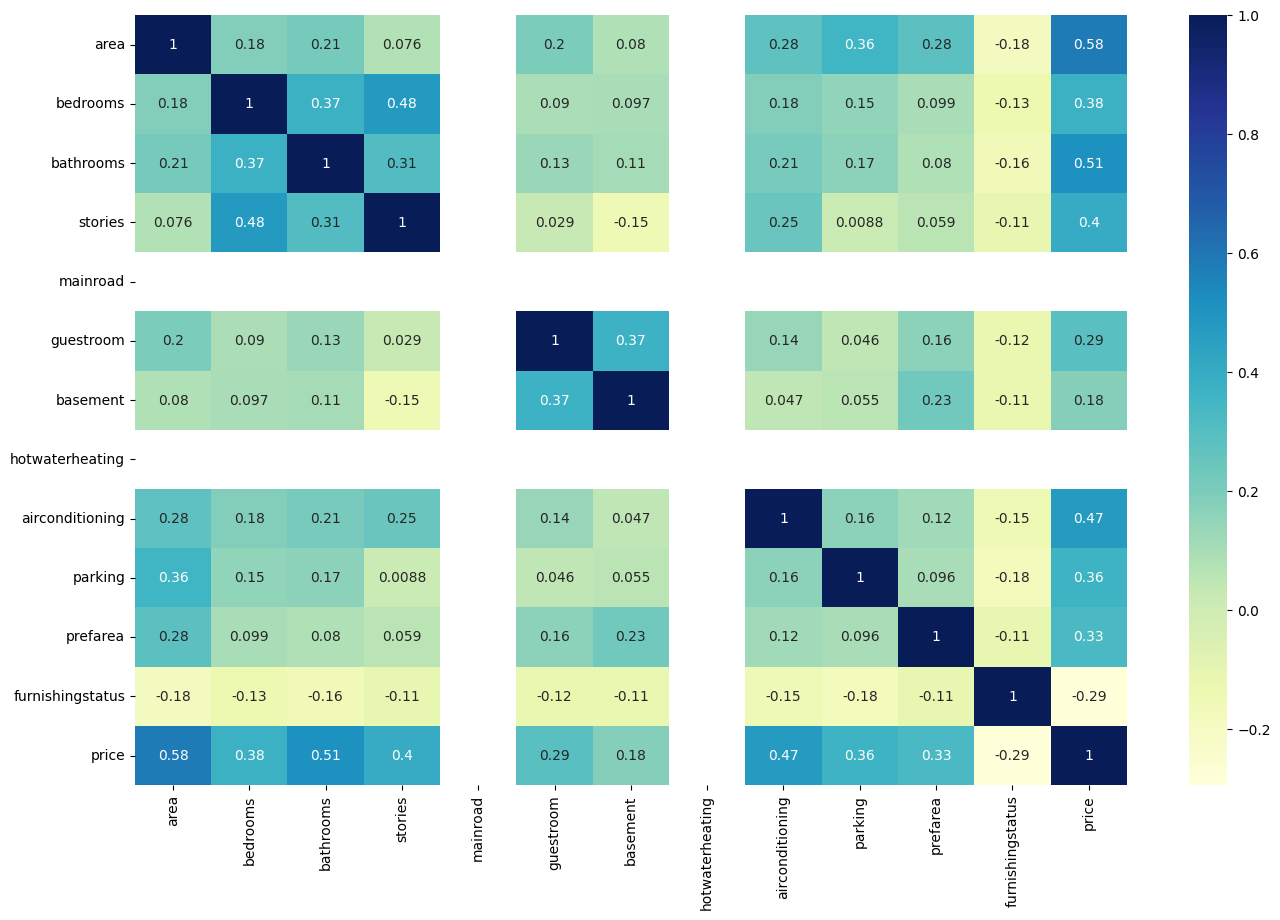

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [29]:
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

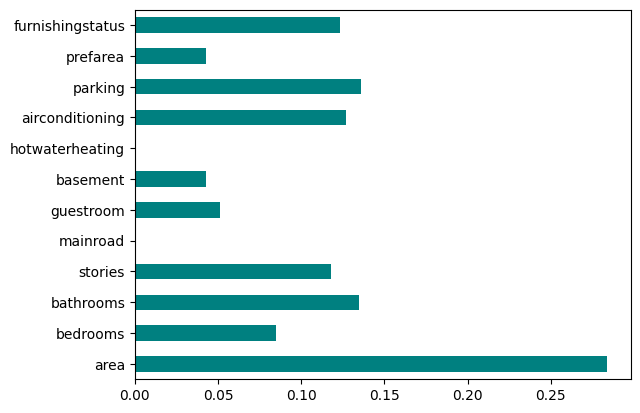

In [30]:
c = mutual_info_regression(x,y)
f = pd.Series(c,df.columns[0:len(df.columns)-1])
f.plot(kind = "barh",color = "teal")
plt.show()

# Feature selection and Model training

In [31]:
X = df[["area","parking","furnishingstatus","stories","bathrooms","airconditioning"]]
Y = df[["price"]]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [33]:
L = LinearRegression()

In [37]:
clf = L.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = clf.predict(x_test)

In [39]:
r2_score(y_test,y_pred)

0.5783111396567991

In [55]:
s = SVR()

In [56]:
param = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],"gamma" : ['scale', 'auto']}

In [57]:
g = GridSearchCV(s,param,cv=4)

In [58]:
g.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [59]:
y_pred = g.predict(x_test)

In [60]:
r2_score(y_test,y_pred)

-0.0633834751684641

# Cross Validation

In [40]:
from sklearn.model_selection import KFold, cross_val_score

In [41]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, Y, cv = k_folds)

In [42]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [-15.02042334  -2.96082268  -9.89438683 -19.69568281   0.        ]
Average CV Score:  -9.514263132593406
Number of CV Scores used in Average:  5
